Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Aiman Lameesa"
ID = "st122876"

---

# Lab 03: Logistic Regression

Thus far, the problems we've encountered have been *regression* problems, in which the target $y \in \mathbb{R}$.

Today we'll start experimenting with *classification* problems, beginning with *binary* classification problems, in which the target $y \in \{ 0, 1 \}$.

## Background

The simplest approach to classification, applicable when the input feature vector $\mathbf{x} \in \mathbb{R}^n$, is a simple generalization of what we
do in linear regression. Recall that in linear regression, we assume that the target is drawn from a Gaussian distribution whose mean is a linear function
of $\mathbf{x}$:

$$ y \sim {\cal N}(\theta^\top \mathbf{x}, \sigma^2) $$

In logistic regression, similarly, we'll assume that the target is drawn from a Bernoulli distribution with parameter $p$ being the probability of
class 1:

$$ y \sim \text{Bernoulli}(p) $$

That's fine, but how do we model the parameter $p$? How is it related to $\mathbf{x}$?

In linear regression, we assume that the mean of the Gaussian is $\theta^\top \mathbf{x}$, i.e., a linear function of $\mathbf{x}$.

In logistic regression, we'll assume that $p$ is a "squashed" linear function of $\mathbf{x}$, i.e.,

$$ p = \text{sigmoid}(\theta^\top \mathbf{x}) = g(\theta^\top \mathbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}. $$

Later, when we introduce generalized linear models, we'll see why $p$ should take this form. For now, though, we can simply note that the selection makes
sense. Since $p$ is a discrete probability, $p$ is bounded by $0 \le p \le 1$. The sigmoid function $g(\cdot)$ conveniently obeys these bounds:


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

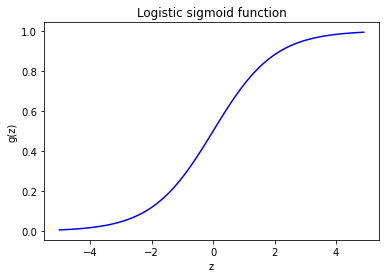

In [3]:
z = np.arange(-5, 5, 0.1)
plt.plot(z, sigmoid(z), 'b-')
plt.xlabel('z')
plt.ylabel('g(z)')
plt.title('Logistic sigmoid function')
plt.show()

We see that the sigmoid approaches 0 as its input approaches $-\infty$ and approaches 1 as its input approaches $+\infty$. If its input is 0, its value is 0.5.

Again, this choice of function may seem strange at this point, but bear with it! We'll derive this function from a more general principle, the generalized
linear model, later.

OK then, we now understand that for logistic regression, the assumptions are:

1. The *data* are pairs $(\textbf{x}, y) \in \mathbb{R}^n \times \{ 0, 1 \}$.
1. The *hypothesis function* is $h_\theta(\textbf{x}) = \frac{1}{1+e^{-\theta^\top \mathbf{x}}}$.

What else do we need... ? A cost function and an algorithm for minimizing that cost function!

## Cost function for logistic regression

You can refer to the lecture notes to see the derivation, but for this lab, let's just skip to the chase.
With the hypothesis $h_\theta(\mathbf{x})$ chosen as above, the log likelihood function $\ell(\theta)$ can be derived as
$$ \ell(\theta) = \log {\cal L}(\theta) =  \sum_{i=1}^{m}y^{(i)}\log(h_{\theta}(\mathbf{x}^{(i)})) + (1 - y^{(i)})\log(1 - (h_{\theta}(\mathbf{x}^{(i)})) .$$

Negating the log likelihood function to obtain a loss function, we have

$$ J(\theta) = - \sum_{i=1}^m y^{(i)}\log h_\theta(\mathbf{x}^{(i)}) + (1-y^{(i)})\log(1-h_\theta(\textbf{x}^{(i)})) .$$

There is no closed-form solution to this problem like there is in linear regression, so we have to use gradient descent to find $\theta$ minimizing $J(\theta)$.
Luckily, the function *is* convex in $\theta$ so there is just a single global minimum, and gradient descent is guaranteed to get us there eventually if we take
the right step size.

The *stochastic* gradient of $J$, for a single observed pair $(\mathbf{x}, y)$, turns out to be (see lecture notes)

$$\nabla_J(\theta) = (h_\theta(\mathbf{x}) - y)\mathbf{x} .$$

Give some thought as to whether following this gradient to increase the loss $J$ would make a worse classifier, and vice versa!

Finally, we obtain the update rule for the $j^{th}$ iteration selecting training pattern $i$:

$$ \theta^{(j+1)} \leftarrow \theta^{(j)} + \alpha(y^{(i)} - h_\theta(\textbf{x}^{(i)}))\textbf{x}^{(i)} .$$ 

Note that we can perform *batch gradient descent* simply by summing the single-pair gradient over the entire training set before taking a step,
or *mini-batch gradient descent* by summing over a small subset of the data.

## Example dataset 1: student admissions data

This example is from Andrew Ng's machine learning course on Coursera.

The data contain students' scores for two standardized tests and an admission decision (0 or 1).


In [4]:
# Load student admissions data.
data = np.loadtxt('ex2data1.txt',delimiter = ',')
exam1_data = data[:,0]
exam2_data = data[:,1]
X = np.array([exam1_data, exam2_data]).T
y = data[:,2]

# Output some sample data

print('Exam scores', X[0:5,:])
print('-----------------------------')
print('Admission decision', y[0:5])

Exam scores [[34.62365962 78.02469282]
 [30.28671077 43.89499752]
 [35.84740877 72.90219803]
 [60.18259939 86.3085521 ]
 [79.03273605 75.34437644]]
-----------------------------
Admission decision [0. 0. 0. 1. 1.]


Let's plot the data...

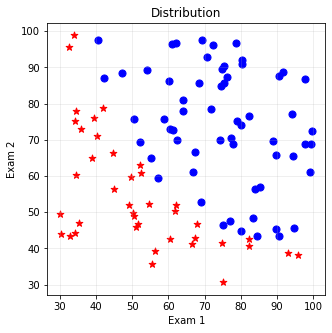

In [6]:
# Plot the data
idx_0 = np.where(y == 0)
idx_1 = np.where(y == 1)

fig1 = plt.figure(figsize=(5, 5)) 
ax = plt.axes()
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Distribution')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(exam1_data[idx_0], exam2_data[idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(exam1_data[idx_1], exam2_data[idx_1], s=50, c='b', marker='o', label='Admitted')
plt.show()

Let's see if we can find good values for $\theta$ without normalizing the data.
We will definitely want to split the data into train and test, however...

In [7]:
import random
random.seed(12)

# Partion data into training and test datasets
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
y = y.reshape(m, 1)
idx = np.arange(0, m)
random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];

y_train = y[train_idx];
y_test = y[test_idx];

### All important functions are here
- Sigmoid function
- Hypothesis function
- Gradient function
- Cost $j$ and gradient function

In [8]:
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

def h(X, theta):
    return sigmoid(X @ theta)

def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]
    
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

### Initialize theta

In [9]:
# Get a feel for how h works
theta_initial = np.zeros((n+1, 1))

print('Initial theta:', theta_initial)
print('Initial predictions:', h(XX, theta_initial)[0:5,:])
print('Targets:', y[0:5,:])

Initial theta: [[0.]
 [0.]
 [0.]]
Initial predictions: [[0.5]
 [0.5]
 [0.5]
 [0.5]
 [0.5]]
Targets: [[0.]
 [0.]
 [0.]
 [1.]
 [1.]]


### Batch training function for num_iters iterations

In [10]:
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

### Train data

In [11]:
# Train for 3000 iterations on full training set
alpha = .0005
num_iters = 1000000
theta, j_history = train(X_train, y_train, theta_initial, alpha, num_iters)

print("Theta optimized:", theta)
print("Cost with optimized theta:", j_history[-1])

Theta optimized: [[-11.29380461]
 [  0.10678604]
 [  0.07994591]]
Cost with optimized theta: 0.24972975869900035


### Plot graph

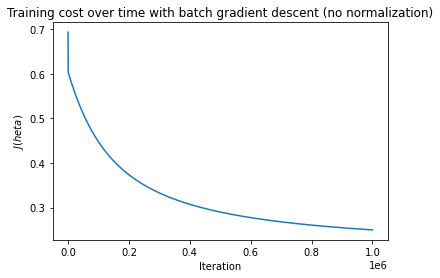

In [12]:
plt.plot(j_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### In-lab exercise from example 1 (Total 35 points)

That took a long time, right?

See if you can do better. 

1. Try increasing the learning rate $\alpha$ and starting with a better initial $\theta$. How much does it help?
   - Try at least 2 learning rate $\alpha$ with 2 difference $\theta$ (4 experiments)
   - Do not forget to plot the graph to compare youre results

2. Better yet, try *normalizing the data* and see if the training converges better. How did it go? 
   - Do not forget to plot the graph to compare youre results between unnormalized and normalized data.

3. Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.




### Exercise 1.1 (5 points)

Fill $\alpha$ and $\theta$

In [13]:
# grade task: change 'None' value to number(s) or function
# YOUR CODE HERE
# raise NotImplementedError()
# declare your alphas
alpha1 = 0.005
alpha2 = 0.001

# initialize thetas as you want
theta_initial1 = np.array([[1],[0],[-1]])
theta_initial2 = np.array([[-1],[0],[1]])

# define your num iterations
num_iters = 500000

In [14]:
alpha_list = [alpha1, alpha2]
print('alpha 1:', alpha1)
print('alpha 2:', alpha2)

theta_initial_list = [theta_initial1, theta_initial2]
print('theta 1:', theta_initial_list[0])
print('theta 2:', theta_initial_list[1])

print('Use num iterations:', num_iters)

# Test function: Do not remove
assert alpha_list[0] is not None and alpha_list[1] is not None, "Alpha has not been filled"
chk1 = isinstance(alpha_list[0], (int, float))
chk2 = isinstance(alpha_list[1], (int, float))
assert chk1 and chk2, "Alpha must be number"
assert theta_initial_list[0] is not None and theta_initial_list[1] is not None, "initialized theta has not been filled"
chk1 = isinstance(theta_initial_list[0], (list,np.ndarray))
chk2 = isinstance(theta_initial_list[1], (list,np.ndarray))
assert chk1 and chk2, "Theta must be list"
chk1 = ((n+1, 1) == theta_initial_list[0].shape)
chk2 = ((n+1, 1) == theta_initial_list[1].shape)
assert chk1 and chk2, "Theta size are incorrect"
assert num_iters is not None and isinstance(num_iters, int), "num_iters must be integer"
print("success!")
# End Test function

alpha 1: 0.005
alpha 2: 0.001
theta 1: [[ 1]
 [ 0]
 [-1]]
theta 2: [[-1]
 [ 0]
 [ 1]]
Use num iterations: 500000
success!


### Exercise 1.2 (5 points)

Train data

In [15]:
# grade task: change 'None, None' value to number(s) or function
j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        # raise NotImplementedError()
        theta_i, j_history_i =  train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)

<ipython-input-8-a7b4ef539c0f>:12: RuntimeWarning: divide by zero encountered in log
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
<ipython-input-8-a7b4ef539c0f>:12: RuntimeWarning: invalid value encountered in multiply
  error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))


In [16]:
# Test function: Do not remove
assert theta_list[0] is not None and j_history_list[0] is not None, "No values in theta_list or j_history_list"
chk1 = isinstance(theta_list[0], (list,np.ndarray))
chk2 = isinstance(j_history_list[0][0], (int, float))
assert chk1 and chk2, "Wrong type in theta_list or j_history_list"
print("success!")
# End Test function

success!


### Exercise 1.3 (10 points)

Plot graph

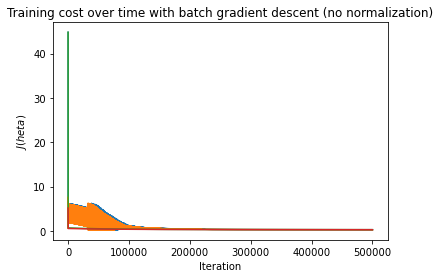

In [17]:
# YOUR CODE HERE
# raise NotImplementedError()
for i in range( len(j_history_list)):
    plt.plot(j_history_list[i])
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (no normalization)")
plt.show()

### Exercise 1.4 (10 points)

- Repeat your training, but **normalized data** before run training
- Compare the results between **normalized data** and **unnormalized data**

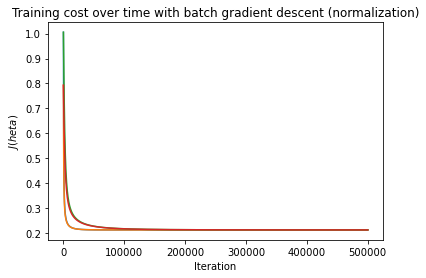

In [18]:
# code here
data = np.array(X, dtype=float);
mean = np.mean(X,axis=0)
std = np.std(X,axis=0)
# data_norm = (data-mean)/std

X_train_norm = (X_train[:,1:]-mean)/std
X_train_norm = np.insert(X_train_norm, 0, 1, axis=1)
X_test_norm =  (X_test[:,1:]-mean)/std

j_history_list_norm = []
theta_list_norm = []

for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        # YOUR CODE HERE
        # raise NotImplementedError()
        theta_i, j_history_i= train(X_train_norm, y_train, theta_initial, alpha, num_iters)
        # theta_i, j_history_i = None, None
        j_history_list_norm.append(j_history_i)
        theta_list_norm.append(theta_i)

for i in range(len(j_history_list_norm)):
    plt.plot(j_history_list_norm[i])
plt.xlabel("Iteration")
plt.ylabel("$J(\theta)$")
plt.title("Training cost over time with batch gradient descent (normalization)")
plt.show()

### Exercise 1.5 (5 points)

Discuss the effects of normalization, learning rate, and initial $\theta$ in your report.

Normalizing the data before training helps to speed up the learning and lead to faster convergence since the data becomes more consistent than before. Learning rate should be carefully chosen to train a model. A larger learning rate can cause the model to converge to a suboptimal solution whereas a smaller learning rate might not help to improve the performance. This is why, it is important to choose a learning rate which can help to converge to the optimal solution with the number of iterations. Initial theta doea not effect much with the increasing number of iterations but it should be selected carefully if we have a few number of iterations in the training.

### Decision boundary

Note that when $\theta^\top \textbf{x} = 0$, we have $h_\theta(\textbf{x}) = 0.5$. That is, we are
equally unsure as to whether $\textbf{x}$ belongs to class 0 or class 1. The contour at which
$h_\theta(\textbf{x}) = 0.5$ is called the classifier's *decision boundary*.

We know that in the plane, the equation $$ax+by+c=0$$ is the general form of a 2D line. In our case, we have
$$\theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0$$ as our decision boundary, but clearly, this is just a 2D line
in the plane. So when we plot $x_1$ against $x_2$, it is easy to plot the boundary line.

In [19]:
def boundary_points(X, theta):
    v_orthogonal = np.array([[theta[1,0]],[theta[2,0]]])
    v_ortho_length = np.sqrt(v_orthogonal.T @ v_orthogonal)
    dist_ortho = theta[0,0] / v_ortho_length
    v_orthogonal = v_orthogonal / v_ortho_length
    v_parallel = np.array([[-v_orthogonal[1,0]],[v_orthogonal[0,0]]])
    projections = X @ v_parallel
    proj_1 = min(projections)
    proj_2 = max(projections)
    point_1 = proj_1 * v_parallel - dist_ortho * v_orthogonal
    point_2 = proj_2 * v_parallel - dist_ortho * v_orthogonal
    return point_1, point_2

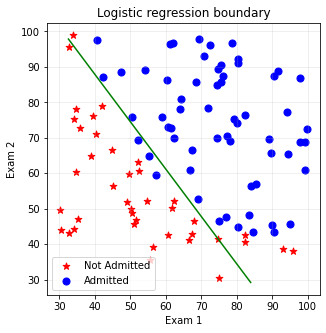

In [20]:
fig1 = plt.figure(figsize=(5,5)) 
ax = plt.axes() 
ax.set_aspect(aspect = 'equal', adjustable = 'box')
plt.title('Logistic regression boundary')
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.grid(axis='both', alpha=.25)
ax.scatter(X[:,0][idx_0], X[:,1][idx_0], s=50, c='r', marker='*', label='Not Admitted')
ax.scatter(X[:,0][idx_1], X[:,1][idx_1], s=50, c='b', marker='o', label='Admitted')
point_1, point_2 = boundary_points(X, theta)
plt.plot([point_1[0,0], point_2[0,0]],[point_1[1,0], point_2[1,0]], 'g-')
plt.legend(loc=0)
plt.show()


You'll have to adjust the above code to make it work with normalized data.

### Test set performance

Now let's apply the learned classifier to the test data we reserved in the beginning:


In [21]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [22]:
y_test_pred_soft = h(X_test, theta)
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.6636, hard R^2 0.6931, accuracy 0.93


For classification, accuracy is probably the more useful measure of goodness of fit.

## Example 2: Loan prediction dataset

Let's take another example dataset and see what we can do with it.

This dataset is from [Kaggle](https://www.kaggle.com/altruistdelhite04/loan-prediction-problem-dataset).

The data concern loan applications. It has 12 independent variables, including 5 categorical variables. The dependent variable is the decision "Yes" or "No" for extending a loan to an individual who applied.

One thing we will have to do is to clean the data, by filling in missing values and converting categorical data to reals.
We will use the Python libraries pandas and sklearn to help with the data cleaning and preparation.

### Read the data and take a look

In [23]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [24]:
# Import Pandas. You may need to run "pip3 install pandas" at the console if it's not already installed

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import the data

data_train = pd.read_csv('train_LoanPrediction.csv')
data_test = pd.read_csv('test_LoanPrediction.csv')

# Start to explore the data

print('Training data shape', data_train.shape)
print('Test data shape', data_test.shape)

print('Training data:\n', data_train)


Training data shape (614, 13)
Test data shape (367, 12)
Training data:
       Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001002    Male      No          0      Graduate            No   
1    LP001003    Male     Yes          1      Graduate            No   
2    LP001005    Male     Yes          0      Graduate           Yes   
3    LP001006    Male     Yes          0  Not Graduate            No   
4    LP001008    Male      No          0      Graduate            No   
..        ...     ...     ...        ...           ...           ...   
609  LP002978  Female      No          0      Graduate            No   
610  LP002979    Male     Yes         3+      Graduate            No   
611  LP002983    Male     Yes          1      Graduate            No   
612  LP002984    Male     Yes          2      Graduate            No   
613  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amoun

In [25]:
# Check for missing values in the training and test data

print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())
print('Missing values for test data \n ------------------------\n', data_test.isnull().sum())

Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64
Missing values for test data 
 ------------------------
 Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64


### Handle missing values

We can see from the above table that the `Married` column has 3 missing values in the training dataset and 0 missing values in the test dataset.
Let's take a look at the distribution over the datasets then fill in the missing values in approximately the same ratio.

You may be interested to look at the [documentation of the Pandas `fillna()` function](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.fillna.html). It's great!

In [26]:
# Compute ratio of each category value
# Divide the missing values based on ratio
# Fillin the missing values
# Print the values before and after filling the missing values for confirmation

print(data_train['Married'].value_counts())

married = data_train['Married'].value_counts()
print('Elements in Married variable', married.shape)
print('Married ratio ', married[0]/sum(married.values))

def fill_martial_status(data, yes_num_train, no_num_train):        
    data['Married'].fillna('Yes', inplace = True, limit = yes_num_train)
    data['Married'].fillna('No', inplace = True, limit = no_num_train)  

fill_martial_status(data_train, 2, 1)
print(data_train['Married'].value_counts()) 
print('Missing values for train data:\n------------------------\n', data_train.isnull().sum())

Yes    398
No     213
Name: Married, dtype: int64
Elements in Married variable (2,)
Married ratio  0.6513911620294599
Yes    400
No     214
Name: Married, dtype: int64
Missing values for train data:
------------------------
 Loan_ID               0
Gender               13
Married               0
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


Now the number of examples missing the `Married` attribute is 0.

Excercise: Complete the data processing based on examples given and logistic regression model on training dataset. Estimate the Accuracy (goodness of fit) on test dataset.

In [27]:
# Another example of filling in missing values for the "number of dependents" attribute.
# Here we see that categorical values are all numeric except one value "3+" 
# Create a new category value "4" for "3+" and ensure that all the data is numeric

print(data_train['Dependents'].value_counts())
dependent = data_train['Dependents'].value_counts()

print('Dependent ratio 1 ', dependent['0'] / sum(dependent.values))
print('Dependent ratio 2 ', dependent['1'] / sum(dependent.values))
print('Dependent ratio 3 ', dependent['2'] / sum(dependent.values))
print('Dependent ratio 3+ ', dependent['3+'] / sum(dependent.values))

def fill_dependent_status(num_0_train, num_1_train, num_2_train, num_3_train, num_0_test, num_1_test, num_2_test, num_3_test):        
    data_train['Dependents'].fillna('0', inplace=True, limit = num_0_train)
    data_train['Dependents'].fillna('1', inplace=True, limit = num_1_train)
    data_train['Dependents'].fillna('2', inplace=True, limit = num_2_train)
    data_train['Dependents'].fillna('3+', inplace=True, limit = num_3_train)
    data_test['Dependents'].fillna('0', inplace=True, limit = num_0_test)
    data_test['Dependents'].fillna('1', inplace=True, limit = num_1_test)
    data_test['Dependents'].fillna('2', inplace=True, limit = num_2_test)
    data_test['Dependents'].fillna('3+', inplace=True, limit = num_3_test)

fill_dependent_status(9, 2, 2, 2, 5, 2, 2, 1)

print(data_train['Dependents'].value_counts())

# Convert category value "3+" to "4"

data_train['Dependents'].replace('3+', 4, inplace = True)
data_test['Dependents'].replace('3+', 4, inplace = True)


0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64
Dependent ratio 1  0.5759599332220368
Dependent ratio 2  0.17028380634390652
Dependent ratio 3  0.1686143572621035
Dependent ratio 3+  0.08514190317195326
0     354
1     104
2     103
3+     53
Name: Dependents, dtype: int64


Once missing values are filled in, you'll want to convert strings to numbers.

Finally, here's an example of replacing missing values for a numeric attribute. Typically, we would use the mean of the attribute over the training set. 

In [28]:
print(data_train['LoanAmount'].value_counts())

LoanAmt = data_train['LoanAmount'].value_counts()

print('mean loan amount ', np.mean(data_train["LoanAmount"]))

loan_amount_mean = np.mean(data_train["LoanAmount"])

data_train['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 22)
data_test['LoanAmount'].fillna(loan_amount_mean, inplace=True, limit = 5)

120.0    20
110.0    17
100.0    15
187.0    12
160.0    12
         ..
570.0     1
300.0     1
376.0     1
117.0     1
311.0     1
Name: LoanAmount, Length: 203, dtype: int64
mean loan amount  146.41216216216216


## Take-home exercise (65 points)

Using the data from Example 2 above, finish the data cleaning and
preparation. Build a logistic regression model based on the
cleaned dataset and report the accuracy on the test and training sets.

- Setup X and Y data (10 points)
- Train data and return theta and J value. Find the good $\alpha$ and you may normalized data before train. (30 points)
- Use $\theta$ and implement in test set. (10 points)
- Summarize what did you do and how to find the best result in this take home exercise. (15 points)

## To turn in

Turn in a brief report in the form of a Jupyter notebook explaining what
you did for the in-lab exercise and the take-home exercise. Discuss what
you learned in terms of normalization and data cleaning and the results
you obtained.


In [29]:
data_train.isnull().sum() 

Loan_ID               0
Gender               13
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [30]:
data_test.isnull().sum() 

Loan_ID               0
Gender               11
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [31]:
print(data_train['Gender'].value_counts())

Male      489
Female    112
Name: Gender, dtype: int64


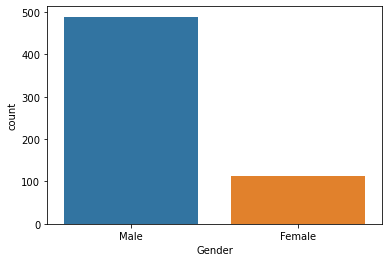

In [32]:
import seaborn as sns
sns.countplot(data_train['Gender'])

In [33]:
pd.crosstab(data_train['Gender'], data_train['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Gender,,,
Female,37,75,112
Male,150,339,489
All,187,414,601


In [34]:
data_train['Gender'] = data_train['Gender'].fillna(data_train['Gender'].mode()[0])
data_test['Gender'] = data_test['Gender'].fillna(data_test['Gender'].mode()[0])

data_train['Gender'].replace('Male', 0, inplace = True)
data_test['Gender'].replace('Male', 0, inplace = True)
data_train['Gender'].replace('Female', 1, inplace = True)
data_test['Gender'].replace('Female', 1, inplace = True)

In [35]:
data_train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [36]:
data_test.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [37]:
print(data_train['Self_Employed'].value_counts())

No     500
Yes     82
Name: Self_Employed, dtype: int64


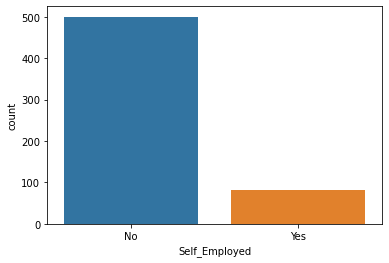

In [38]:
sns.countplot(data_train['Self_Employed'])

In [39]:
pd.crosstab(data_train['Self_Employed'], data_train['Loan_Status'],margins = True)

Loan_Status,N,Y,All
Self_Employed,,,
No,157,343,500
Yes,26,56,82
All,183,399,582


In [40]:
data_train['Self_Employed'] = data_train['Self_Employed'].fillna(data_train['Self_Employed'].mode()[0])
data_test['Self_Employed'] = data_test['Self_Employed'].fillna(data_test['Self_Employed'].mode()[0])

data_train['Self_Employed'].replace('No', 0, inplace = True)
data_test['Self_Employed'].replace('No', 0, inplace = True)
data_train['Self_Employed'].replace('Yes', 1, inplace = True)
data_test['Self_Employed'].replace('Yes', 1, inplace = True)

In [41]:
data_train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [42]:
data_test.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [43]:
print(data_train['Credit_History'].value_counts())

1.0    475
0.0     89
Name: Credit_History, dtype: int64


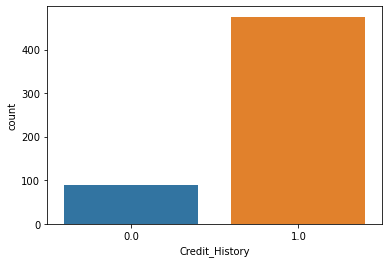

In [44]:
sns.countplot(data_train['Credit_History'])

In [45]:
pd.crosstab(data_train['Credit_History'], data_train['Loan_Status'], margins = True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [46]:
data_train['Credit_History'] = data_train['Credit_History'].fillna(data_train['Credit_History'].mode()[0])
data_test['Credit_History'] = data_test['Credit_History'].fillna(data_test['Credit_History'].mode()[0])

In [47]:
data_train.isnull().sum() 

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [48]:
data_test.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     6
Credit_History       0
Property_Area        0
dtype: int64

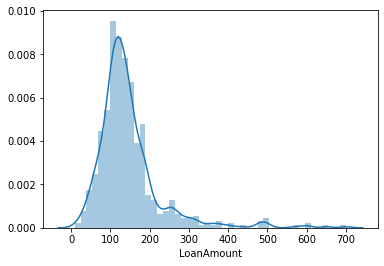

In [49]:
sns.distplot(data_train['LoanAmount'])

In [50]:
print(data_train['Loan_Amount_Term'].value_counts())

360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64


In [51]:
data_train['Loan_Amount_Term'] = data_train['Loan_Amount_Term'].fillna(data_train['Loan_Amount_Term'].mode()[0])
data_test['Loan_Amount_Term'] = data_test['Loan_Amount_Term'].fillna(data_test['Loan_Amount_Term'].mode()[0])

In [52]:
data_train.isnull().sum() 

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [53]:
data_test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

In [54]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,No,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,Yes,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,Yes,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,Yes,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,No,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,No,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,Yes,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,Yes,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,Yes,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [55]:
data_train['Married'].replace('No', 0, inplace = True)
data_test['Married'].replace('No', 0, inplace = True)
data_train['Married'].replace('Yes', 1, inplace = True)
data_test['Married'].replace('Yes', 1, inplace = True)

In [56]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [57]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,Urban
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,Urban
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,Urban
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,Semiurban
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,Rural


In [ ]:
data_train['Property_Area'].unique()

In [60]:
data_train['Property_Area'].replace('Rural', 0, inplace = True)
data_train['Property_Area'].replace('Semiurban', 1, inplace = True)
data_train['Property_Area'].replace('Urban', 2, inplace = True)

In [61]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [62]:
data_test['Property_Area'].replace('Rural', 0, inplace = True)
data_test['Property_Area'].replace('Semiurban', 1, inplace = True)
data_test['Property_Area'].replace('Urban', 2, inplace = True)

In [63]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,0


In [64]:
data_train['Loan_Status'].replace('N', 0, inplace = True)
data_train['Loan_Status'].replace('Y', 1, inplace = True)

In [65]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,Graduate,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,Graduate,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,Graduate,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,Not Graduate,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,Graduate,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,Graduate,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,4,Graduate,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,Graduate,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,Graduate,0,7583,0.0,187.000000,360.0,1.0,2,1


In [66]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,Graduate,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,Graduate,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,Graduate,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,Graduate,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,Not Graduate,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,Not Graduate,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,Graduate,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,Graduate,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,Graduate,0,5000,2393,158.0,360.0,1.0,0


In [67]:
data_train['Education'].replace('Not Graduate', 0, inplace = True)
data_test['Education'].replace('Not Graduate', 0, inplace = True)
data_train['Education'].replace('Graduate', 1, inplace = True)
data_test['Education'].replace('Graduate', 1, inplace = True)

In [68]:
data_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,LP001003,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,LP001005,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,LP001006,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,LP001008,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,LP002979,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,LP002983,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,LP002984,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [69]:
data_test

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2
363,LP002975,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,LP002980,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,LP002986,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [70]:
data_train = data_train.drop(['Loan_ID'],axis = 1)
data_test = data_test.drop(['Loan_ID'],axis = 1)

In [71]:
data_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,0,0,1,0,5849,0.0,146.412162,360.0,1.0,2,1
1,0,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,0,1,0,1,1,3000,0.0,66.000000,360.0,1.0,2,1
3,0,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,0,0,0,1,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.000000,360.0,1.0,0,1
610,0,1,4,1,0,4106,0.0,40.000000,180.0,1.0,0,1
611,0,1,1,1,0,8072,240.0,253.000000,360.0,1.0,2,1
612,0,1,2,1,0,7583,0.0,187.000000,360.0,1.0,2,1


In [72]:
data_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,0,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,0,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,0,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,0,0,0,0,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,0,1,4,0,1,4009,1777,113.0,360.0,1.0,2
363,0,1,0,1,0,4158,709,115.0,360.0,1.0,2
364,0,0,0,1,0,3250,1993,126.0,360.0,1.0,1
365,0,1,0,1,0,5000,2393,158.0,360.0,1.0,0


In [73]:
trainX = data_train.drop('Loan_Status', axis = 1 )
y = data_train['Loan_Status']

In [74]:
def normalized_data(data):
    means = np.mean(data, axis=0)
    stds = np.std(data, axis=0) 
    data_norm = (data - means) / stds
    return data_norm

In [75]:
# normalizing data
X = normalized_data(np.array(trainX.astype(float)))

In [76]:
X.shape

(614, 11)

In [77]:
y = (np.array(y)).reshape(-1,1)

In [78]:
y.shape

(614, 1)

In [79]:
m, n = X.shape
XX = np.insert(X, 0, 1, axis=1)
idx = np.arange(0, m)
np.random.shuffle(idx)
percent_train = .6
m_train = int(m * percent_train)
train_idx = idx[0:m_train]
test_idx = idx[m_train:]
X_train = XX[train_idx,:];
X_test = XX[test_idx,:];
y_train = y[train_idx];
y_test = y[test_idx];

In [80]:
# Defining sigmoid function
def sigmoid(z):   
    return 1 / (1 + np.exp(-z))

In [81]:
# Defining hypothesis function
def h(X, theta):
    return sigmoid(X @ theta)

In [82]:
# Defining gradient function
def grad_j(X, y, y_pred):
    return X.T @ (y - y_pred) / X.shape[0]

In [83]:
# Defining cost function
def j(theta, X, y):    
    y_pred = h(X, theta)
    error = (-y * np.log(y_pred)) - ((1 - y) * np.log(1 - y_pred))
    cost = sum(error) / X.shape[0]
    grad = grad_j(X, y, y_pred)
    return cost[0], grad

In [84]:
# Defining batch training function
def train(X, y, theta_initial, alpha, num_iters):
    theta = theta_initial
    j_history = []
    for i in range(num_iters):
        cost, grad = j(theta, X, y)
        theta = theta + alpha * grad
        j_history.append(cost)
    return theta, j_history

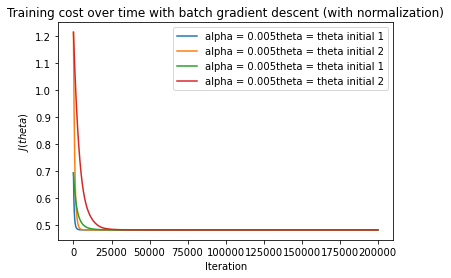

In [85]:
alpha1 = 0.005
alpha2 = 0.001

theta_initial1 = np.zeros((n+1, 1)).reshape(-1,1)
theta_initial2 = np.ones((n+1, 1)).reshape(-1,1)

num_iters = 200000

theta_initial_list = [theta_initial1,theta_initial2]
alpha_list = [alpha1, alpha2]

j_history_list = []
theta_list = []
for alpha in alpha_list:
    for theta_initial in theta_initial_list:
        theta_i, j_history_i = train(X_train, y_train, theta_initial, alpha, num_iters)
        j_history_list.append(j_history_i)
        theta_list.append(theta_i)
        

for i in j_history_list:
    plt.plot(i)
    
plt.xlabel("Iteration")
plt.ylabel("$J(\ttheta)$")
plt.title("Training cost over time with batch gradient descent (with normalization)")
plt.legend(['alpha = ' + str(alpha1) + 'theta = theta initial 1',
            'alpha = ' + str(alpha1) + 'theta = theta initial 2',
            'alpha = ' + str(alpha1) + 'theta = theta initial 1',
            'alpha = ' + str(alpha1) + 'theta = theta initial 2'])
plt.show()

In [86]:
def r_squared(y, y_pred):
    return 1 - np.square(y - y_pred).sum() / np.square(y - y.mean()).sum()

In [87]:
y_test_pred_soft = h(X_test, theta_list[0])
y_test_pred_hard = (y_test_pred_soft > 0.5).astype(int)

test_rsq_soft = r_squared(y_test, y_test_pred_soft)
test_rsq_hard = r_squared(y_test, y_test_pred_hard)
test_acc = (y_test_pred_hard == y_test).astype(int).sum() / y_test.shape[0]

print('Got test set soft R^2 %0.4f, hard R^2 %0.4f, accuracy %0.2f' % (test_rsq_soft, test_rsq_hard, test_acc))

Got test set soft R^2 0.3228, hard R^2 0.1557, accuracy 0.83


In [88]:
from sklearn.metrics import classification_report

y_pred = np.round(h(X_test,theta_list[0]))
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.44      0.60        72
           1       0.81      0.98      0.89       174

    accuracy                           0.83       246
   macro avg       0.86      0.71      0.74       246
weighted avg       0.84      0.83      0.80       246



In [89]:
testX =  normalized_data(np.array(data_test.astype(float)))

In [90]:
testX = np.insert(testX, 0, 1, axis=1)

In [91]:
y_pred_testX = h(testX,theta_list[0])

In [92]:
y_pred_testX

array([[0.86715136],
       [0.85167719],
       [0.82870397],
       [0.854812  ],
       [0.73127277],
       [0.69219695],
       [0.74884807],
       [0.09676851],
       [0.82890756],
       [0.64376447],
       [0.72507974],
       [0.82508766],
       [0.84521956],
       [0.15337621],
       [0.7892394 ],
       [0.79474137],
       [0.81833216],
       [0.86852703],
       [0.68726021],
       [0.72382933],
       [0.81803298],
       [0.80105738],
       [0.79759425],
       [0.72861553],
       [0.74494726],
       [0.01260528],
       [0.85663692],
       [0.76356422],
       [0.86198051],
       [0.74963527],
       [0.73229124],
       [0.84583907],
       [0.73213419],
       [0.82079699],
       [0.85295884],
       [0.08327973],
       [0.81030236],
       [0.80870088],
       [0.75092535],
       [0.75400012],
       [0.8623995 ],
       [0.80983894],
       [0.77161431],
       [0.69651911],
       [0.81972794],
       [0.79697873],
       [0.7674418 ],
       [0.661

In [93]:
y_pred_testX[:5]

array([[0.86715136],
       [0.85167719],
       [0.82870397],
       [0.854812  ],
       [0.73127277]])

In this exercise, the data was cleaned and preprocessed after loading the data. The missing values for the columns in the dataset was checked and then handled. Also, thecategorical columns were converted into numerical ones before training the model. 

After cleaning and preprocessing the data, the data was normalized since normalization helps it leads to faster convergence comparing with non-normalized data. Moreover, normalization helps to obtain a smooth loss curve unlike non-normalized data. In this exercise, a learning rate of 0.005 obtained faster convergence than a learning rate of 0.001. The learning rate should be carefully decided since a higher learning rate can result to a supoptimal solution quickly and a lower learning rate can get stuck in the training process. However, the initial theta values affected the initial iterations but it did not affect the training after around 25000 iterations.

In this exercise, I got the best result after normalizing the data and training the data with a learning rate of 0.005 and theta_initial1 after 200000 iterations.